## About a company

Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company

## Questions for the analysis

-   What are some trends in smart device usage?

-   How could these trends apply to Bellabeat customers?

-   How could these trends help influence Bellabeat marketing strategy

## Data Analysis Cycle

-   Ask

-   Prepare

-   Process

-   Analyze

-   Share

-   Act

## Ask phase

**Business task :** Analyze the usage data of non-Bellabeat smart devices to identify trends and patterns. These insights will then be applied to one of Bellabeat's products to create an informed marketing strategy. The end goal is to utilize these insights to drive user growth and product engagement for Bellabeat.

## Prepare phase

For the purpose of my analysis, I leveraged the FitBit Fitness Tracker Data. This dataset, hosted on Kaggle, is publicly accessible and was shared via Mobius.

**Dataset Overview:**

Sample size = 33 participants

FitBit Fitness Tracker Data include:

-   Physical Activity
    -   Activity
    -   Intensity
    -   Steps
-   Phisiology
    -   Heart
    -   Rate
    -   Calories
-   Monitoring
    -   Weight
    -   Sleep

Data was collected via Amazon Mechanical Turk over 31 days in 2016.

**Data Limitations:**

-   Small sample size

-   Collected in 2016

-   Limited descriptive data on the users (age, sex, career/lifestyle)

## Process phase

**Tools used:** I have chosen R for this task because it's a powerful tool for statistical analysis and data visualization. R provides various packages like dplyr for data manipulation, tidyr for data tidying, and ggplot2 for data visualization which are extremely helpful in data analysis.

Firstly, I will load all necessary packages for my further analysis:

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Then I load all the necessary data:

In [2]:
daily_steps <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
hourly_steps <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')
daily_activity <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
daily_calories <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
weight <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
daily_sleep <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
heartrate_seconds <- read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')

Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet thi

Now I am ready for data cleaning. I am starting with cleaning the column names for all datasets:

In [3]:
daily_steps <- clean_names(daily_steps)
hourly_steps <- clean_names(hourly_steps)
daily_activity <- clean_names(daily_activity)
daily_calories <- clean_names(daily_calories)
weight <- clean_names(weight)
daily_sleep <- clean_names(daily_sleep)
heartrate_seconds <- clean_names(heartrate_seconds)

Then I create the function for handling the missing values and apply it to the datasets:

In [4]:
handle_missing_values <- function(df) {
  df <- df %>% mutate(across(where(is.numeric), ~replace_na(., mean(., na.rm = TRUE))))
  return(df)
}

daily_steps <- handle_missing_values(daily_steps)
hourly_steps <- handle_missing_values(hourly_steps)
daily_activity <- handle_missing_values(daily_activity)
daily_calories <- handle_missing_values(daily_calories)
weight <- handle_missing_values(weight)
daily_sleep <- handle_missing_values(daily_sleep)
heartrate_seconds <- handle_missing_values(heartrate_seconds)

Checking the data type in datasets:

In [5]:
check_data_types <- function(df) {
  return(sapply(df, class))
}

check_data_types(daily_steps)
check_data_types(hourly_steps)
check_data_types(daily_activity)
check_data_types(daily_calories)
check_data_types(weight)
check_data_types(daily_sleep)
check_data_types(heartrate_seconds)

id activity_day   step_total 
   "numeric"  "character"    "numeric"

id activity_hour    step_total 
    "numeric"   "character"     "numeric"

id              activity_date 
                 "numeric"                "character" 
               total_steps             total_distance 
                 "numeric"                  "numeric" 
          tracker_distance logged_activities_distance 
                 "numeric"                  "numeric" 
      very_active_distance moderately_active_distance 
                 "numeric"                  "numeric" 
     light_active_distance  sedentary_active_distance 
                 "numeric"                  "numeric" 
       very_active_minutes      fairly_active_minutes 
                 "numeric"                  "numeric" 
    lightly_active_minutes          sedentary_minutes 
                 "numeric"                  "numeric" 
                  calories 
                 "numeric"

id activity_day     calories 
   "numeric"  "character"    "numeric"

id             date        weight_kg    weight_pounds 
       "numeric"      "character"        "numeric"        "numeric" 
             fat              bmi is_manual_report           log_id 
       "numeric"        "numeric"        "logical"        "numeric"

id            sleep_day  total_sleep_records 
           "numeric"          "character"            "numeric" 
total_minutes_asleep    total_time_in_bed 
           "numeric"            "numeric"

id        time       value 
  "numeric" "character"   "numeric"

From the checked data types I see that I can convert date and time columns to the Date type and POSIXct type:

In [6]:
daily_steps$activity_day <- as.Date(daily_steps$activity_day, format = "%m/%d/%Y")
daily_activity$activity_date <- as.Date(daily_activity$activity_date, format = "%m/%d/%Y")
daily_calories$activity_day <- as.Date(daily_calories$activity_day, format = "%m/%d/%Y")
weight$date <- as.Date(weight$date, format = "%m/%d/%Y")
daily_sleep$sleep_day <- as.Date(daily_sleep$sleep_day, format = "%m/%d/%Y")
hourly_steps$activity_hour <- as.POSIXct(hourly_steps$activity_hour, format = "%m/%d/%Y %I:%M:%S %p")
heartrate_seconds$time <- as.POSIXct(heartrate_seconds$time, format = "%m/%d/%Y %I:%M:%S %p")

Also I want to filter 0 values in daily steps:

In [7]:
# Check for 0 values
zero_steps <- daily_activity %>% filter(total_steps == 0)

# Print the number of rows with 0 steps
print(nrow(zero_steps))

# Remove rows with 0 steps
daily_activity <- daily_activity %>% filter(total_steps != 0)

# Find the minimum total steps value (check)
min(daily_activity$total_steps)

[1] 77


[1] 4

Now my data is cleaned and ready for the Analyze stage.

## Analyze phase

Let's have a look at summary statistics of the data sets:

In [8]:
summary(daily_activity$total_steps)
summary(daily_calories$calories)
summary(daily_sleep$total_minutes_asleep)
summary(daily_sleep$total_time_in_bed)
summary(daily_sleep$total_sleep_records)
summary(daily_steps$step_total)
summary(heartrate_seconds$value)
summary(weight$weight_kg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4    4923    8053    8319   11092   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    1828    2134    2304    2793    4900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   361.0   433.0   419.5   490.0   796.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0   403.0   463.0   458.6   526.0   961.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.119   1.000   3.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0    3790    7406    7638   10727   36019 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  36.00   63.00   73.00   77.33   88.00  203.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.60   61.40   62.50   72.04   85.05  133.50 

Some insights from the summary:

-   The average number of steps taken per day is around 7638, with a median of 7406 steps. The maximum number of steps recorded in a day is 36019, which is quite high compared to the average

-   The average number of calories burned per day is around 2304, with a median of 2134 calories. The maximum number of calories burned in a day is 4900, which is more than twice the average. This could be due to intense physical activity or could be an outlier.

-   On average, users sleep for about 419 minutes (around 7 hours) per night, with a median of 433 minutes. The maximum sleep recorded is 796 minutes, which is over 13 hours. This suggests that most users get a healthy amount of sleep, but there might be some instances of oversleeping

-   The average heart rate recorded is around 77.3 beats per minute, with a median of 73 beats per minute. The maximum heart rate recorded is 203 beats per minute, which is quite high and could be due to intense physical activity or a health condition

-   The average weight of users is around 72 kg, with a median of 62.5 kg. The maximum weight recorded is 133.5 kg

For further analysis, I want to look into the relationships between these variables. So, let's move to the share stage of my analysis.

## Share phase

In [9]:
n_distinct(daily_activity$id) 
n_distinct(daily_calories$id) 
n_distinct(daily_sleep$id) 
n_distinct(weight$id) 
n_distinct(heartrate_seconds$id)

[1] 33

[1] 33

[1] 24

[1] 8

[1] 14

The data provided informs us about the count of participants for every distinct data set.

The data sets for activity, calories, and intensities each contain 33 participants, while the sleep data set includes 24 and heart rate data - 14. However, the weight data set only consists of 8 participants, which is an insignificant number to draw reliable recommendations or conclusions from.

Let's visualize user engagement in tracking each activity:

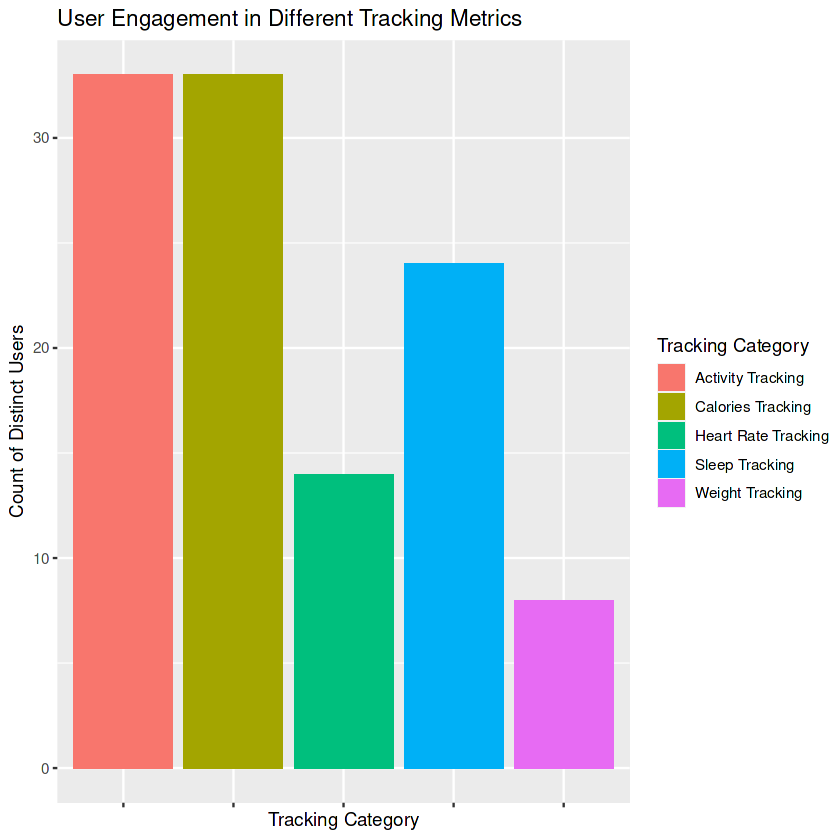

In [10]:
# Creating a data frame for plotting
user_engagement <- data.frame(
  category = c("Activity Tracking", "Sleep Tracking", "Calories Tracking", "Weight Tracking", "Heart Rate Tracking"),
  count = c(33, 24, 33, 8, 14)
)

# Creating the bar chart
ggplot(user_engagement, aes(x = category, y = count, fill = category)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_blank()) +
  labs(x = "Tracking Category", y = "Count of Distinct Users",
       title = "User Engagement in Different Tracking Metrics",
       fill = "Tracking Category")

We can see that the user engagement varies across different tracking metrics:

-   "Activity Tracking" and "Calories Tracking" have the highest user engagement with 33 distinct users. This suggests that these are popular features that many users regularly use. It could be due to the fact that these metrics are easily understandable and directly relate to common health goals.

-   "Sleep Tracking" is the next most used feature with 24 distinct users. This indicates a substantial interest in monitoring sleep patterns, perhaps for users interested in improving their sleep quality or understanding their sleep habits.

-   "Heart Rate Tracking" is used by 14 distinct users. This might be because not all devices have heart rate monitoring capabilities, or because some users might not find this information as immediately useful or easy to interpret as activity or calories.

-   "Weight Tracking" has the lowest user engagement with only 8 distinct users. This could be due to various reasons such as users preferring to track their weight using other methods, or the fact that weight can be a sensitive issue and users might not feel comfortable or motivated to track it regularly.

Let's have a look on the steps&calories correlation:

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


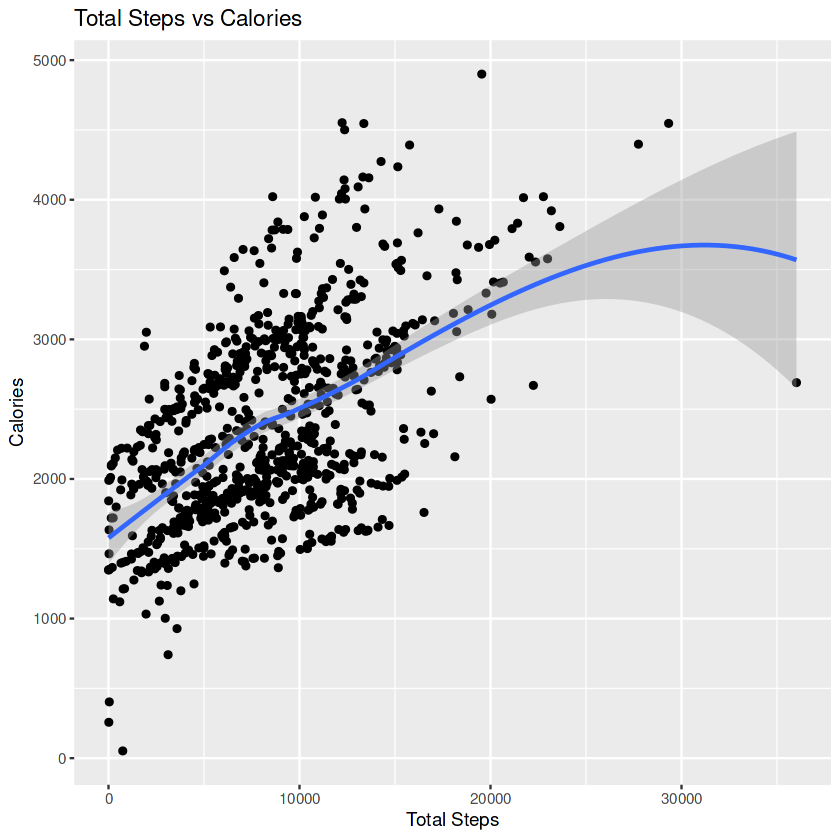

In [11]:
# Total Steps VS Calories
ggplot(daily_activity, aes(x = total_steps, y = calories)) +
  geom_point() +
  geom_smooth() +
  labs(x = "Total Steps", y = "Calories", title = "Total Steps vs Calories")

The graph reveals a direct relationship between Total Steps and Calories, which aligns with our understanding of physical activity - the higher the level of activity (more steps taken), the greater the number of calories expended.

Now I want to analyze activity levels during the week:

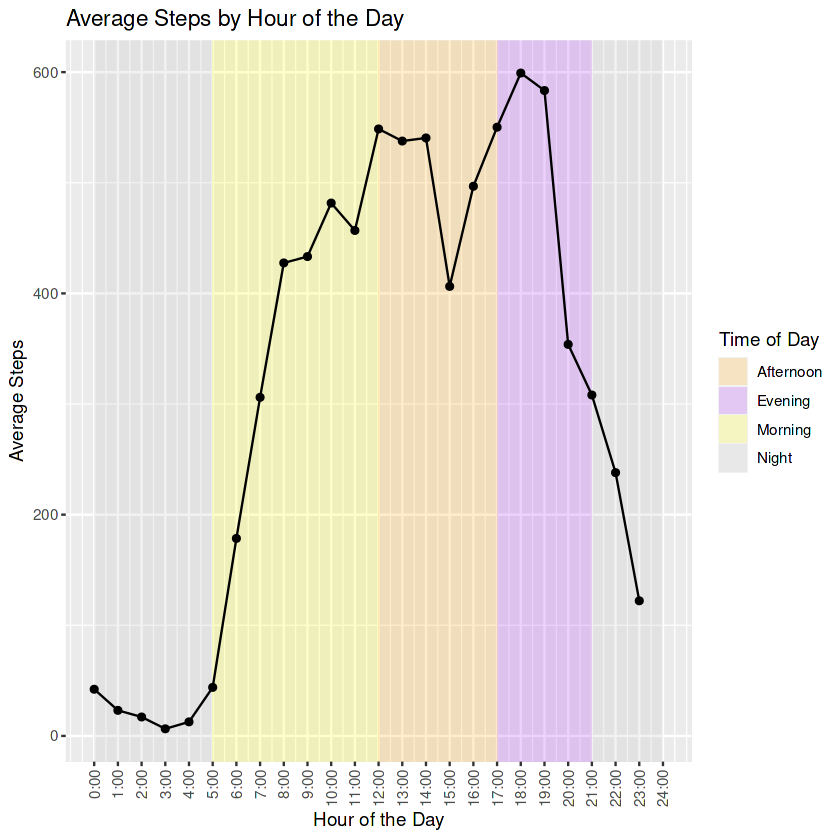

In [12]:
# Creating a weekday column
daily_activity$weekday <- weekdays(daily_activity$activity_date)

# Trends by the day of the week
daily_activity_by_day <- daily_activity %>%
  group_by(weekday) %>%
  summarise(
    avg_steps = mean(total_steps),
    avg_distance = mean(total_distance),
    avg_very_active_minutes = mean(very_active_minutes),
    avg_fairly_active_minutes = mean(fairly_active_minutes),
    avg_lightly_active_minutes = mean(lightly_active_minutes),
    avg_sedentary_minutes = mean(sedentary_minutes),
    avg_calories = mean(calories)
  )

# Extracting the hour from ActivityHour
hourly_steps$hour <- format(hourly_steps$activity_hour, "%H")

# Calculating average steps per hour
avg_steps_per_hour <- hourly_steps %>%
  group_by(hour) %>%
  summarise(avg_steps = mean(step_total), .groups = "drop")

# Creating a data frame for the time periods
time_periods <- data.frame(
  time_of_day = c("Night", "Morning", "Afternoon", "Evening", "Night"),
  start_hour = c(0, 5, 12, 17, 21),
  end_hour = c(5, 12, 17, 21, 24)
)

# Creating the plot
ggplot(avg_steps_per_hour, aes(x = as.numeric(hour), y = avg_steps)) +
  geom_rect(data = time_periods, aes(xmin = start_hour, xmax = end_hour, ymin = -Inf, ymax = Inf, fill = time_of_day), alpha = 0.2, inherit.aes = FALSE) +
  geom_line(group = 1) +
  geom_point() +
  scale_x_continuous(breaks = seq(0, 24, 1), labels = function(x) paste0(x, ":00")) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(x = "Hour of the Day", y = "Average Steps", title = "Average Steps by Hour of the Day", fill = "Time of Day") +
  scale_fill_manual(values = c("Night" = "grey", "Morning" = "yellow", "Afternoon" = "orange", "Evening" = "purple"))

The visualization clearly indicates that the evening is typically the most active part of the day, on average. This could be attributed to individuals engaging in exercise or other physical activities after their work or school day. Conversely, the night time sees the least activity, which is expected as this is when most people are asleep.

Interestingly, there is a noticeable decline in activity during the afternoon. This could potentially be linked to lunchtime, where individuals might be taking a break from their activities to eat.

Now that we know the activity patterns, I can move to the sleep patterns.

Sleep efficiency is a measure of the quality of a person's sleep. It is calculated as the ratio of the total time spent asleep (not just time in bed) to the total amount of time spent in bed.

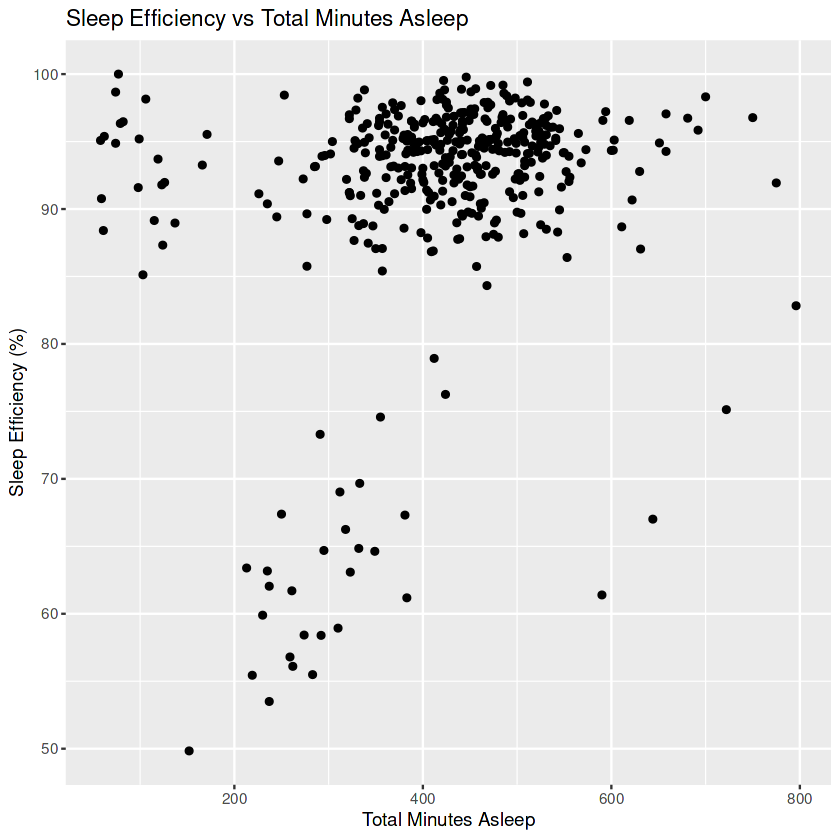

In [13]:
# Calculating sleep efficiency
daily_sleep <- daily_sleep %>% mutate(sleep_efficiency = total_minutes_asleep / total_time_in_bed * 100)

# Creating a scatterplot of sleep efficiency vs time asleep
ggplot(daily_sleep, aes(x = total_minutes_asleep, y = sleep_efficiency)) +
  geom_point() +
  labs(x = "Total Minutes Asleep", y = "Sleep Efficiency (%)", title = "Sleep Efficiency vs Total Minutes Asleep")

From the graph we can see that there is more likely no correlation between those 2 variables. Here are a few reasons why there might be no correlation between sleep efficiency and total minutes asleep:

-   Different sleep patterns

-   Individual differences (age, lifestyle, health status, and stress levels)

-   Sleep disorders (insomnia, sleep)

-   Measurement errors

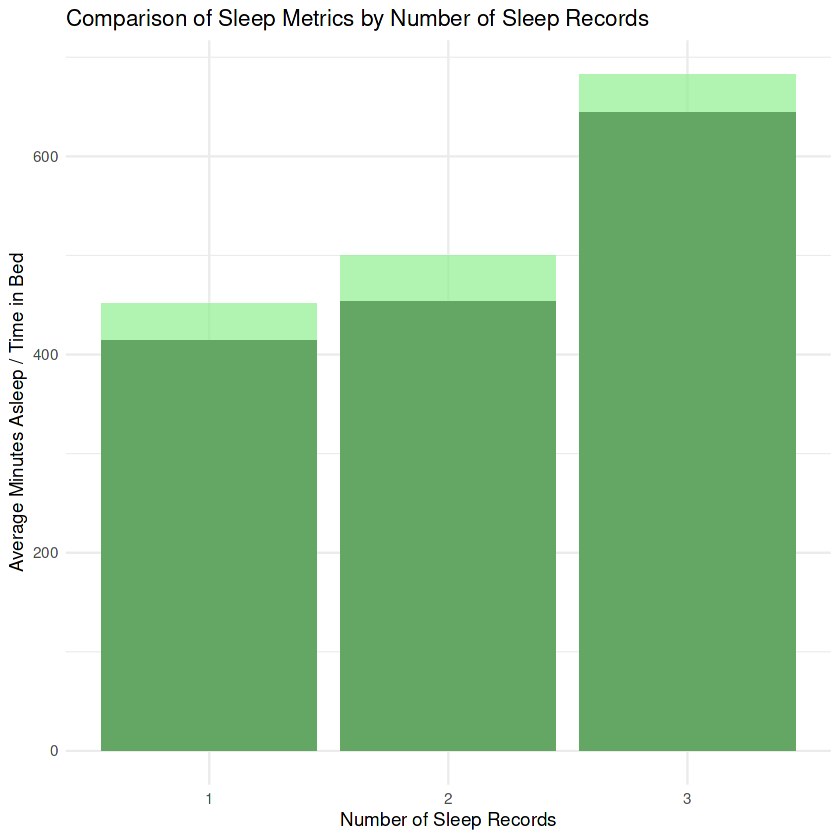

In [14]:
# Calculate the average total minutes asleep and total time in bed per sleep record
sleep_metrics <- daily_sleep %>%
  group_by(total_sleep_records) %>%
  summarise(
    avg_minutes_asleep = mean(total_minutes_asleep),
    avg_time_in_bed = mean(total_time_in_bed)
  )

# Create the bar chart
ggplot(sleep_metrics, aes(x = as.factor(total_sleep_records))) +
  geom_bar(aes(y = avg_minutes_asleep), stat = "identity", fill = "black") +
  geom_bar(aes(y = avg_time_in_bed), stat = "identity", fill = "lightgreen", alpha = 0.7) +
  labs(
    x = "Number of Sleep Records",
    y = "Average Minutes Asleep / Time in Bed",
    title = "Comparison of Sleep Metrics by Number of Sleep Records",
    fill = "Metric"
  ) +
  theme_minimal() +
  theme(legend.position = "top")

This graph provides an interesting insight into sleep patterns. It shows that as the number of sleep records increases, both the average time in bed and the average minutes asleep increase. However, the gap between these two metrics remains relatively constant. This suggests that even though individuals with more sleep records spend more time in bed, they are not necessarily having troubles with asleeping.

## Act phase

Based on the analysis, we can draw several conclusions:

1.  **User Engagement**: Users are most engaged in activity tracking and calorie tracking, with fewer users engaged in sleep tracking, weight tracking, and heart rate tracking. This suggests that users are primarily using their devices to monitor their physical activity and dietary habits.

2.  **Activity Levels**: Users tend to be more active on weekdays compared to weekends. The most active hours of the day are in the evening, with a significant drop in activity during the afternoon, possibly due to lunch breaks or rest periods.

3.  **Sleep Patterns**: There is a wide variation in sleep patterns among users. While there is no clear correlation between sleep efficiency and total minutes asleep, the data suggests that users with more sleep records tend to spend more time in bed but not necessarily have troubles with getting asleep.

These insights can be applied in several ways to drive user growth and product engagement for Bellabeat:

1.  **Product Development**: Bellabeat could develop features that encourage users to engage more with sleep tracking, weight tracking, and heart rate tracking. This could include educational content about the importance of these metrics for overall health, or gamification features that reward users for tracking these metrics.

2.  **Marketing Strategy**: Marketing campaigns could be timed to coincide with the most active times of the day and week, and could emphasize the benefits of using Bellabeat devices to track activity and calories. Additionally, marketing messages could be tailored to address the common sleep issues identified in the data.

3.  **User Engagement**: Bellabeat could implement features that encourage users to improve their sleep efficiency, such as sleep coaching or personalized sleep recommendations. This could help to increase user engagement with the sleep tracking feature.

Next steps could include conducting user surveys to gain more insights into why users are less engaged with certain tracking features, and testing different strategies to increase engagement with these features. Additionally, it would be beneficial to analyze data over a longer time period to identify any seasonal trends in user behavior.

Additional data that could be used to expand on these findings include demographic data (such as age, gender, and location), data on the use of other features of the devices (such as reminders or alarms), and qualitative data from user feedback or reviews.

## Thank you for your interest to my Bellabeat Case Study!